# Homework 9
### ASTR-324, Spring 2017, Ivezic & Juric, University of Washington
https://github.com/uw-astr-324-s17/astr-324-s17


## Problem

Use Kernel Density Estimation with a top-hat, Gaussian, and exponential kernel on the color-magnitude diagrams (CMDs) of the two data sets (`Field A` and `Field B`) from Homework 7. Make the analog of Figure 6.3 from the textbook (the code for that figure is included below), but with the CMDs in each panel (i.e., $g-r$ on the $x$, and $g$ on the $y$ axis).

Experiment with different kernel bandwidths, plotting one that visually seems "best" (i.e., a good balance of bias vs. variance) for each kernel.

Don't forget to change the figure size so that individual panels have aspect ratios closer to what is common for color-magnitude diagrams (i.e., x:y $\approx$ 4:6 or so).

## Solution

In [1]:
import pandas as pd
fieldA = pd.read_csv('data/fieldA_mjuric.csv')
fieldB = pd.read_csv('data/fieldB_mjuric.csv')

# Add a column for color
fieldA['g-r'] = fieldA.g - fieldA.r
fieldB['g-r'] = fieldB.g - fieldB.r

In [2]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm, Normalize

from scipy.spatial import cKDTree
from scipy.stats import gaussian_kde

from astroML.datasets import fetch_great_wall

from sklearn.neighbors import KernelDensity

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=10, usetex=True)

def make_plots(X, h):
    #------------------------------------------------------------
    # Create  the grid on which to evaluate the results
    Nx = 250
    Ny = 250
    xmin, xmax = (-0.5, 2)
    ymin, ymax = (22, 14)

    #------------------------------------------------------------
    # Evaluate for several models
    Xgrid = np.vstack(map(np.ravel, np.meshgrid(np.linspace(xmin, xmax, Nx),
                                                np.linspace(ymin, ymax, Ny)))).T

    kernels = ['gaussian', 'tophat', 'exponential']
    dens = []

    kde1 = KernelDensity(h, kernel='gaussian')
    log_dens1 = kde1.fit(X).score_samples(Xgrid)
    dens1 = X.shape[0] * np.exp(log_dens1).reshape((Ny, Nx))

    kde2 = KernelDensity(h, kernel='tophat')
    log_dens2 = kde2.fit(X).score_samples(Xgrid)
    dens2 = X.shape[0] * np.exp(log_dens2).reshape((Ny, Nx))

    kde3 = KernelDensity(h, kernel='exponential')
    log_dens3 = kde3.fit(X).score_samples(Xgrid)
    dens3 = X.shape[0] * np.exp(log_dens3).reshape((Ny, Nx))

    #------------------------------------------------------------
    # Plot the results
    fig = plt.figure(figsize=(10, 15))
    fig.subplots_adjust(left=0.12, right=0.95, bottom=0.2, top=0.9,
                        hspace=0.1, wspace=0.1)

    # First plot: scatter the points
    ax1 = plt.subplot(221)
    ax1.scatter(X[:, 0], X[:, 1], s=1, lw=0, c='k')
    ax1.text(0.95, 0.9, "input", ha='right', va='top',
             transform=ax1.transAxes,
             bbox=dict(boxstyle='round', ec='k', fc='w'))

    # Second plot: gaussian kernel
    ax2 = plt.subplot(222)
    ax2.imshow(dens1, origin='lower', aspect='auto', norm=Normalize(),
               extent=(xmin, xmax, ymin, ymax), cmap=plt.cm.binary)
    ax2.text(0.95, 0.9, "Gaussian $(h=%.2f)$" % h, ha='right', va='top',
             transform=ax2.transAxes,
             bbox=dict(boxstyle='round', ec='k', fc='w'))

    # Third plot: top-hat kernel
    ax3 = plt.subplot(223)
    ax3.imshow(dens2, origin='lower', aspect='auto', norm=Normalize(),
               extent=(xmin, xmax, ymin, ymax), cmap=plt.cm.binary)
    ax3.text(0.95, 0.9, "top-hat $(h=%.2f)$" % h, ha='right', va='top',
             transform=ax3.transAxes,
             bbox=dict(boxstyle='round', ec='k', fc='w'))

    # Fourth plot: exponential kernel
    ax4 = plt.subplot(224)
    ax4.imshow(dens3, origin='lower', aspect='auto', norm=Normalize(),
               extent=(xmin, xmax, ymin, ymax), cmap=plt.cm.binary)
    ax4.text(0.95, 0.9, "exponential $(h=%.2f)$" % h, ha='right', va='top',
             transform=ax4.transAxes,
             bbox=dict(boxstyle='round', ec='k', fc='w'))

    for ax in [ax1, ax2, ax3, ax4]:
        ax.set_xlim(xmin, xmax)
        ax.set_ylim(ymin, ymax)

    for ax in [ax1, ax2]:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    for ax in [ax3, ax4]:
        ax.set_xlabel('$g-r$')

    for ax in [ax2, ax4]:
        ax.yaxis.set_major_formatter(plt.NullFormatter())

    for ax in [ax1, ax3]:
        ax.set_ylabel('$g$')

    plt.show()

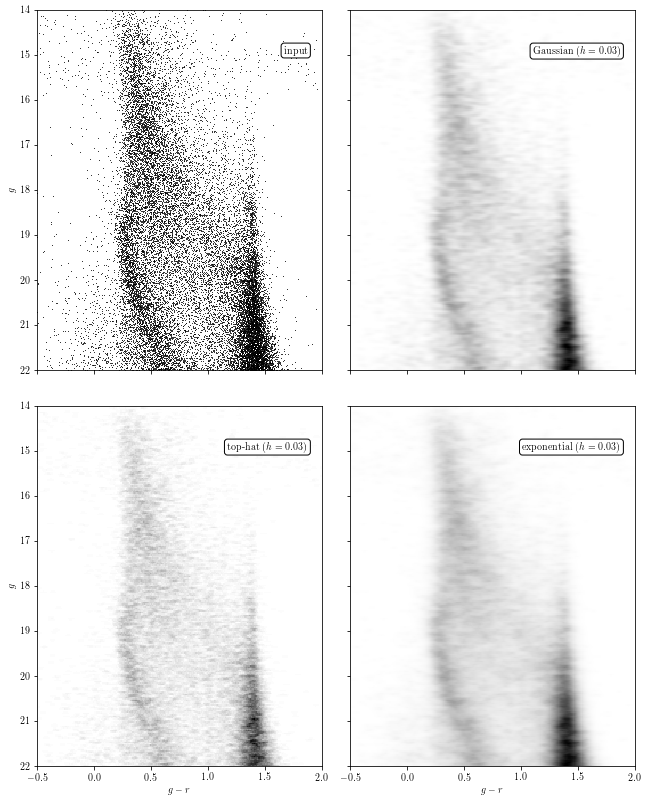

In [4]:
make_plots(fieldB.as_matrix(['g-r','g']), 0.03)

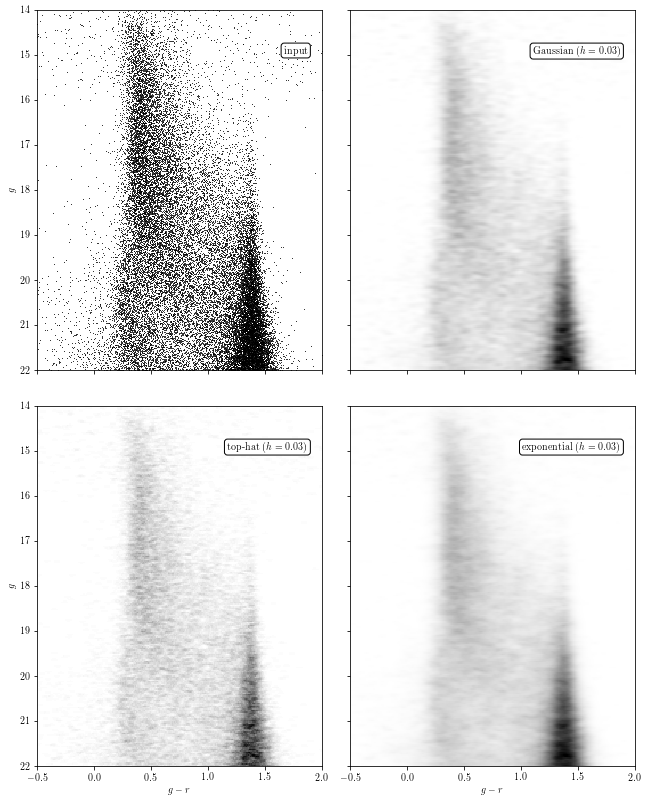

In [5]:
make_plots(fieldA.as_matrix(['g-r','g']), 0.03)